In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True)

In [2]:
# Load the data

data = load_breast_cancer()
X, Y = data.data, data.target

# Reshape the data

X = X.reshape(-1, X.shape[1])
Y = Y.reshape(-1, 1)

In [3]:
# Split the data into two halves training and testing
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.33)

# Preprocess the data by scaling the data
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)

In [4]:
D = data.data.shape[1] # Represent the number of feature

# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)


# Define the loss and optimizer for the model
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [5]:
# Convert each numpy to torch tensors
inputs_train = torch.from_numpy(Xtrain.astype(np.float32))
targets_train = torch.from_numpy(Ytrain.astype(np.float32))

inputs_val = torch.from_numpy(Xval.astype(np.float32))
targets_val = torch.from_numpy(Yval.astype(np.float32))

# Train the model
epochs = 1000
trainlosses = []
vallosses = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    # Forward pass
    outputs_train = model(inputs_train)
    loss_train = criterion(outputs_train, targets_train)
    
    # Track the loss
    trainlosses.append(loss_train)
    
    # Backward pass and Optimize the model
    loss_train.backward()
    optimizer.step()
    
    
    # Compute validation losses 
    outputs_val = model(inputs_val)
    loss_val = criterion(outputs_val, targets_val)
    vallosses.append(loss_val)
    
    print("Epoch : {}/{}, Train-Loss : {:.4f}, Val-Loss : {:.4f}".format(epoch + 1, epochs, loss_train.item(), loss_val.item()))


Epoch : 1/1000, Train-Loss : 0.8444, Val-Loss : 0.8016
Epoch : 2/1000, Train-Loss : 0.8358, Val-Loss : 0.7946
Epoch : 3/1000, Train-Loss : 0.8272, Val-Loss : 0.7876
Epoch : 4/1000, Train-Loss : 0.8187, Val-Loss : 0.7808
Epoch : 5/1000, Train-Loss : 0.8102, Val-Loss : 0.7740
Epoch : 6/1000, Train-Loss : 0.8019, Val-Loss : 0.7673
Epoch : 7/1000, Train-Loss : 0.7937, Val-Loss : 0.7608
Epoch : 8/1000, Train-Loss : 0.7855, Val-Loss : 0.7543
Epoch : 9/1000, Train-Loss : 0.7775, Val-Loss : 0.7478
Epoch : 10/1000, Train-Loss : 0.7696, Val-Loss : 0.7415
Epoch : 11/1000, Train-Loss : 0.7617, Val-Loss : 0.7353
Epoch : 12/1000, Train-Loss : 0.7540, Val-Loss : 0.7292
Epoch : 13/1000, Train-Loss : 0.7463, Val-Loss : 0.7231
Epoch : 14/1000, Train-Loss : 0.7388, Val-Loss : 0.7172
Epoch : 15/1000, Train-Loss : 0.7314, Val-Loss : 0.7113
Epoch : 16/1000, Train-Loss : 0.7240, Val-Loss : 0.7056
Epoch : 17/1000, Train-Loss : 0.7168, Val-Loss : 0.6999
Epoch : 18/1000, Train-Loss : 0.7097, Val-Loss : 0.6943
E

Epoch : 287/1000, Train-Loss : 0.2000, Val-Loss : 0.2739
Epoch : 288/1000, Train-Loss : 0.1995, Val-Loss : 0.2734
Epoch : 289/1000, Train-Loss : 0.1991, Val-Loss : 0.2730
Epoch : 290/1000, Train-Loss : 0.1986, Val-Loss : 0.2725
Epoch : 291/1000, Train-Loss : 0.1981, Val-Loss : 0.2720
Epoch : 292/1000, Train-Loss : 0.1976, Val-Loss : 0.2715
Epoch : 293/1000, Train-Loss : 0.1972, Val-Loss : 0.2711
Epoch : 294/1000, Train-Loss : 0.1967, Val-Loss : 0.2706
Epoch : 295/1000, Train-Loss : 0.1962, Val-Loss : 0.2701
Epoch : 296/1000, Train-Loss : 0.1958, Val-Loss : 0.2697
Epoch : 297/1000, Train-Loss : 0.1953, Val-Loss : 0.2692
Epoch : 298/1000, Train-Loss : 0.1949, Val-Loss : 0.2688
Epoch : 299/1000, Train-Loss : 0.1944, Val-Loss : 0.2683
Epoch : 300/1000, Train-Loss : 0.1940, Val-Loss : 0.2678
Epoch : 301/1000, Train-Loss : 0.1935, Val-Loss : 0.2674
Epoch : 302/1000, Train-Loss : 0.1931, Val-Loss : 0.2669
Epoch : 303/1000, Train-Loss : 0.1926, Val-Loss : 0.2665
Epoch : 304/1000, Train-Loss : 

Epoch : 541/1000, Train-Loss : 0.1273, Val-Loss : 0.2013
Epoch : 542/1000, Train-Loss : 0.1271, Val-Loss : 0.2011
Epoch : 543/1000, Train-Loss : 0.1270, Val-Loss : 0.2010
Epoch : 544/1000, Train-Loss : 0.1268, Val-Loss : 0.2008
Epoch : 545/1000, Train-Loss : 0.1266, Val-Loss : 0.2007
Epoch : 546/1000, Train-Loss : 0.1265, Val-Loss : 0.2005
Epoch : 547/1000, Train-Loss : 0.1263, Val-Loss : 0.2003
Epoch : 548/1000, Train-Loss : 0.1261, Val-Loss : 0.2002
Epoch : 549/1000, Train-Loss : 0.1260, Val-Loss : 0.2000
Epoch : 550/1000, Train-Loss : 0.1258, Val-Loss : 0.1999
Epoch : 551/1000, Train-Loss : 0.1256, Val-Loss : 0.1997
Epoch : 552/1000, Train-Loss : 0.1255, Val-Loss : 0.1996
Epoch : 553/1000, Train-Loss : 0.1253, Val-Loss : 0.1994
Epoch : 554/1000, Train-Loss : 0.1251, Val-Loss : 0.1993
Epoch : 555/1000, Train-Loss : 0.1250, Val-Loss : 0.1991
Epoch : 556/1000, Train-Loss : 0.1248, Val-Loss : 0.1989
Epoch : 557/1000, Train-Loss : 0.1246, Val-Loss : 0.1988
Epoch : 558/1000, Train-Loss : 

Epoch : 816/1000, Train-Loss : 0.0945, Val-Loss : 0.1729
Epoch : 817/1000, Train-Loss : 0.0944, Val-Loss : 0.1728
Epoch : 818/1000, Train-Loss : 0.0943, Val-Loss : 0.1727
Epoch : 819/1000, Train-Loss : 0.0943, Val-Loss : 0.1727
Epoch : 820/1000, Train-Loss : 0.0942, Val-Loss : 0.1726
Epoch : 821/1000, Train-Loss : 0.0941, Val-Loss : 0.1726
Epoch : 822/1000, Train-Loss : 0.0940, Val-Loss : 0.1725
Epoch : 823/1000, Train-Loss : 0.0939, Val-Loss : 0.1724
Epoch : 824/1000, Train-Loss : 0.0938, Val-Loss : 0.1724
Epoch : 825/1000, Train-Loss : 0.0938, Val-Loss : 0.1723
Epoch : 826/1000, Train-Loss : 0.0937, Val-Loss : 0.1722
Epoch : 827/1000, Train-Loss : 0.0936, Val-Loss : 0.1722
Epoch : 828/1000, Train-Loss : 0.0935, Val-Loss : 0.1721
Epoch : 829/1000, Train-Loss : 0.0934, Val-Loss : 0.1721
Epoch : 830/1000, Train-Loss : 0.0933, Val-Loss : 0.1720
Epoch : 831/1000, Train-Loss : 0.0933, Val-Loss : 0.1719
Epoch : 832/1000, Train-Loss : 0.0932, Val-Loss : 0.1719
Epoch : 833/1000, Train-Loss : 

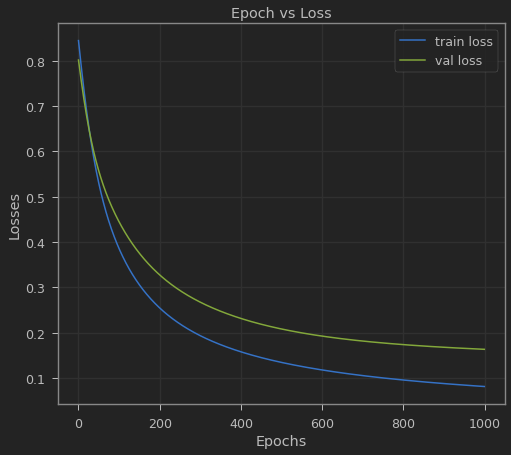

In [6]:
plt.plot(trainlosses, label="train loss")
plt.plot(vallosses, label="val loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

In [10]:
# Get accuracy of the model
trainpreds = model(inputs_train).detach().numpy()
valpreds = model(inputs_val).detach().numpy()

train_acc = np.mean(Ytrain == np.round(trainpreds))
val_acc = np.mean(Yval == np.round(valpreds))

print("Train accuracy : {:.4f}, Val accuracy : {:.4f}".format(train_acc * 100., val_acc * 100.))

Train accuracy : 98.6877, Val accuracy : 93.6170


# Save and Load the model

In [11]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3329, -0.5163, -0.2098, -0.4287, -0.3260, -0.1363, -0.2730, -0.4830,
                       -0.1062,  0.4435, -0.2312,  0.3008, -0.5097, -0.3629, -0.1529, -0.0651,
                       -0.1173, -0.0299, -0.1279,  0.2674, -0.2878, -0.3878, -0.4537, -0.5309,
                       -0.1977, -0.3675, -0.2350, -0.1692, -0.2654, -0.3477]])),
             ('0.bias', tensor([0.3564]))])

In [12]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [14]:
# Load the model

model2 = nn.Sequential(
    nn.Linear(D, 1), 
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('mymodel.pt'))


<All keys matched successfully>

In [17]:
preds = model2(inputs_train).detach().numpy()
acc = np.mean(Ytrain == np.round(preds))
print("Acc : {:.4f}".format(acc * 100))

Acc : 98.6877
